# Simulating Q4 in AT1

In the given network, what are the clustering coefficients of the nodes A and G. Show the solution steps, rather ahn simply provide the answer. 


![Question 4](images/AT1-Q4-question-figure.png)    


# create the nodes in the graph


In [50]:
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
G = nx.Graph()
G.add_nodes_from("ABCDEFGHIJ")

In [52]:
G.nodes()
G.order()

10

## create the edges
first prepare and edge list and use that to create edges

In [53]:
edges = {('A','B'),('A','C'),('A','E'),('A','F'), 
    ('B','C'),
    ('C','E'), ('C','I'),
    ('D','E'), ('D','I'), ('D','G'),('D','H'),
    ('E','F'), ('E','G'), ('E','H'),
    ('G','I'), ('G','H'), ('G','J'),
    ('H','J')
    }

G.add_edges_from(edges)

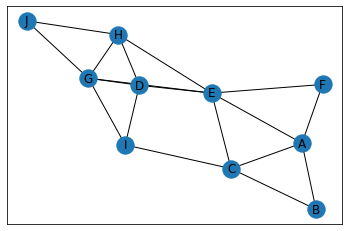

In [54]:
nx.draw_networkx(G)

In [55]:
G.size()

18

## calculate local clustering coeff for all nodes

In [56]:
nx.clustering(G)

{'A': 0.5,
 'B': 1.0,
 'C': 0.3333333333333333,
 'D': 0.6666666666666666,
 'E': 0.3333333333333333,
 'F': 1.0,
 'G': 0.5,
 'H': 0.6666666666666666,
 'I': 0.3333333333333333,
 'J': 1.0}

## step by step for


In [57]:
def clustering_coeff(G, n):
    k = int(G.degree(n))
    n_possible_links = int(k * (k-1) / 2)
    # get a subgraph that is the neighboards of n, but not n
    n_neighbours_subgraph = G.subgraph(G.neighbors(n))#[nn for nn in G.neighbors(n)]
    # size of subgraph, number of edges, is then the number of links in subgraph
    n_neighbours_subgraph_size = n_neighbours_subgraph.size() 
    # Clustering Coeff is number of links in neighbours subgraph/number of possible links of neighbours
    cc = n_neighbours_subgraph_size / n_possible_links
    nn_nx = nx.clustering(G,n)

    print(f'For node {n}'\
        f'\nnumber of neighbours {k}'\
        f'\nnumber of possible links in neighbours {n_possible_links}   -- k(k-1)/2'\
        f'\nnumber of links in neighbours subgraph {n_neighbours_subgraph_size}'\
        f'\nclustering coeff =  number of links in neighbours / number of possible links  = {cc}'\
        f'\nnx.clustering of {n} is {nn_nx}')

In [58]:
clustering_coeff(G, 'A')

For node A
number of neighbours 4
number of possible links in neighbours 6   -- k(k-1)/2
number of links in neighbours subgraph 3
clustering coeff =  number of links in neighbours / number of possible links  = 0.5
nx.clustering of A is 0.5


In [59]:
clustering_coeff(G,'G')

For node G
number of neighbours 5
number of possible links in neighbours 10   -- k(k-1)/2
number of links in neighbours subgraph 5
clustering coeff =  number of links in neighbours / number of possible links  = 0.5
nx.clustering of G is 0.5


In [60]:
clustering_coeff(G,'F')

For node F
number of neighbours 2
number of possible links in neighbours 1   -- k(k-1)/2
number of links in neighbours subgraph 1
clustering coeff =  number of links in neighbours / number of possible links  = 1.0
nx.clustering of F is 1.0
